# Analysis of Olsson 2016 et. al Irf8 perturbation dataset

## Imports

In [1]:
import os
import sys
import glob
import pickle
import pandas as pd
import numpy as np

from pyscenic.rnkdb import FeatherRankingDatabase as RankingDatabase
from pyscenic.utils import modules_from_adjacencies, load_motifs
from pyscenic.prune import prune2df, df2regulons
from pyscenic.aucell import aucell

import seaborn as sns
import scanpy
import scanpy.api as sc

sc.settings.figdir = './Perturb_fig'
output_dir = './Perturb_fig'

/home/andreas/anaconda3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/andreas/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/andreas/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/andreas/anaconda3/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` inst

## Gene level analysis

In [35]:
#Irf8 KO cells
irf8_sc=sc.AnnData(pd.read_csv('Olsson_2016/data_KO_Irf8.tsv.gz', sep = '\t', index_col = 0).T)
irf8_sc.obs['cell-type'] = pd.read_csv('Olsson_2016/cell_KO_Irf8_label.tsv.gz', sep = '\t', header = None).values
irf8_sc.obs['Genotype'] = 'Irf8 --'


#Normal cells
normal_sc=sc.AnnData(pd.read_csv('Olsson_2016/data_Olsson.tsv.gz', sep = '\t', index_col = 0).T)
normal_sc.obs['cell-type'] = pd.read_csv('Olsson_2016/cell_label.tsv.gz', sep = '\t', header = None).values
normal_sc.obs['Genotype'] = 'WT'


#gfi1_sc = sc.AnnData(pd.read_csv('Olsson_2016/data_KO_Gfi1.tsv.gz', sep = '\t', index_col = 0).T)
#gfi1_sc.obs['cell-type'] = pd.read_csv('Olsson_2016/cell_KO_Gfi1_label.tsv.gz', sep = '\t', header = None).values

#irf_gfi_sc=sc.AnnData(pd.read_csv('Olsson_2016/data_KO_Irf8_Gfi1.tsv.gz', sep = '\t', index_col = 0).T)
#irf_gfi_sc.obs['cell-type'] = pd.read_csv('Olsson_2016/cell_KO_Irf8_Gfi1_label.tsv.gz', sep = '\t', header = None).values

adata_ex = scanpy.AnnData.concatenate(normal_sc, irf8_sc)#, gfi1_sc, irf_gfi_sc)


In [30]:
sc.pp.filter_genes(adata_ex, min_cells=(len(adata_ex.obs_names) / 10))

In [18]:
adata_ex

AnnData object with n_obs × n_vars = 444 × 9944 
    obs: 'Genotype', 'batch', 'cell-type'
    var: 'n_cells'

In [19]:
sc.pp.log1p(adata_ex)
adata_ex.raw = adata_ex

In [20]:
sc.pp.highly_variable_genes(adata_ex, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [21]:
#adata_ex = adata_ex[:, adata_ex.var['highly_variable']].copy()

In [22]:
sc.pp.scale(adata_ex)

In [23]:
sc.tl.pca(adata_ex, svd_solver='arpack')

In [24]:
sc.tl.tsne(adata_ex)

In [25]:
sc.pp.neighbors(adata_ex, n_neighbors=10)
sc.tl.umap(adata_ex)

saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/tsne_important_cell_type_GeneExpression.pdf


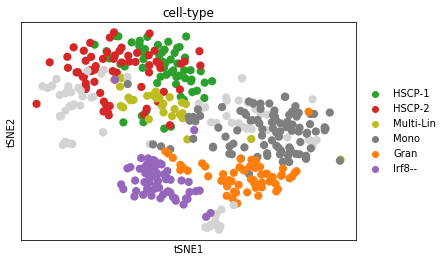

saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/umap_important_cell_type_GeneExpression.pdf


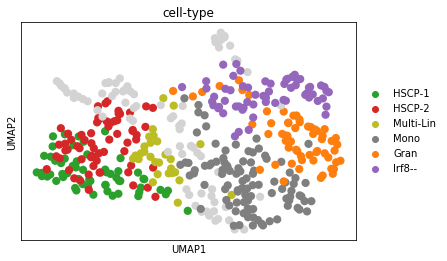

In [42]:
sc.pl.tsne(adata_ex, groups = ['HSCP-1','HSCP-2', 'Multi-Lin', 'Mono', 'Gran', 'Irf8--'], color = ['cell-type'], save='_important_cell_type_GeneExpression.pdf')
sc.pl.umap(adata_ex, groups = ['HSCP-1','HSCP-2', 'Multi-Lin', 'Mono', 'Gran', 'Irf8--'], color = ['cell-type'], save='_important_cell_type_GeneExpression.pdf')

saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/tsne_genotype_KO_GeneExpression.pdf


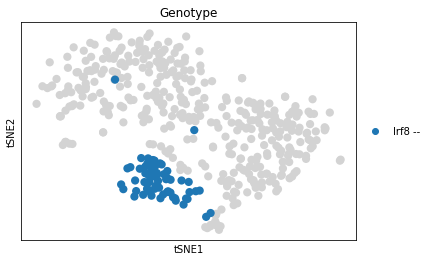

saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/umap_genotype_KO_GeneExpression.pdf


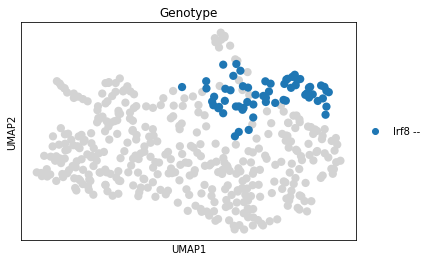

In [48]:
sc.pl.tsne(adata_ex, groups = ['Irf8 --'], color = ['Genotype'], save='_genotype_KO_GeneExpression.pdf') 
sc.pl.umap(adata_ex, groups = ['Irf8 --'], color = ['Genotype'], save='_genotype_KO_GeneExpression.pdf') 

saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/tsne_genotype_WT_GeneExpression.pdf


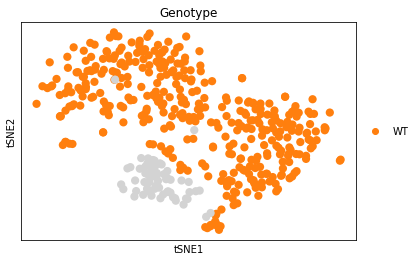

saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/umap_genotype_WT_GeneExpression.pdf


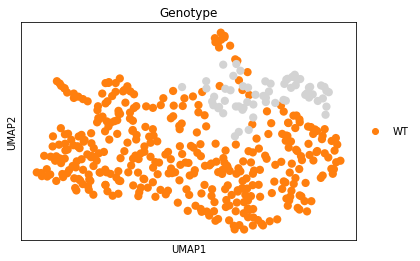

In [49]:
sc.pl.tsne(adata_ex, groups = ['WT'], color = ['Genotype'], save='_genotype_WT_GeneExpression.pdf') 
sc.pl.umap(adata_ex, groups = ['WT'], color = ['Genotype'], save='_genotype_WT_GeneExpression.pdf') 

saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/tsne_IRF8_GeneExpression.pdf


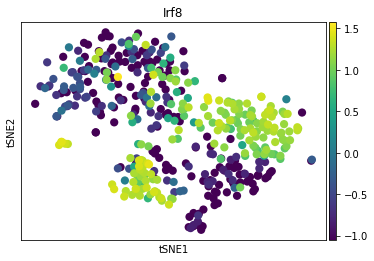

saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/umap_IRF8_GeneExpression.pdf


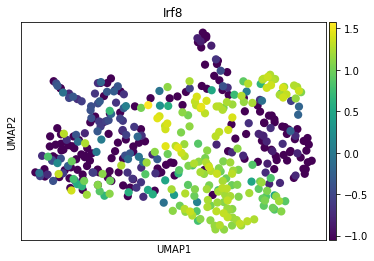

In [50]:
sc.pl.tsne(adata_ex, color=['Irf8'], use_raw=False, save='_IRF8_GeneExpression.pdf')
sc.pl.umap(adata_ex, color=['Irf8'], use_raw=False, save='_IRF8_GeneExpression.pdf')

## Regulon inference

### Infer GRN on WT and IRF8 KO cells

In [12]:
#Settings
DATA_FOLDER="/home/andreas/Documents/notebooks/MCA_TM/SCENIC/database_SCENIC/tmp/perturb"
RESOURCES_FOLDER="/home/andreas/Documents/notebooks/MCA_TM/SCENIC/database_SCENIC/resources"
DATABASE_FOLDER = "/home/andreas/Documents/notebooks/MCA_TM/SCENIC/database_SCENIC/databases/"

#For clusters, probably wont have to use
SCHEDULER="172.24.5.14:8786"

DATABASES_GLOB = os.path.join(DATABASE_FOLDER, "mm9-*.feather")
MOTIF_ANNOTATIONS_FNAME = os.path.join(RESOURCES_FOLDER, "motifs-v9-nr.mgi-m0.001-o0.0.tbl")
MM_TFS_FNAME = os.path.join(RESOURCES_FOLDER, '/work/sduknn/Andreas/TM_MCA/database_SCENIC/making_TF_file/mm_tfs.txt')
#SC_EXP_FNAME = os.path.join(RESOURCES_FOLDER, "PATH.txt")
REGULONS_FNAME = os.path.join(DATA_FOLDER, "regulons_wt-irf8ko_10_percent.p")
MOTIFS_FNAME = os.path.join(DATA_FOLDER, "motifs_wt-irf8ko_10_percent.csv")



In [31]:
#Transpose and check array
ex_matrix = adata_ex.X
ex_matrix.shape

(444, 9944)

In [32]:
#make pandas dataframe
ex_matrix_wtko = pd.DataFrame(data= ex_matrix,
                         index=pd.DataFrame(adata_ex.obs.index.values),
                         columns=adata_ex.var.index.values)

In [15]:
custom_client = SLURMCluster(project='sdusinglecell_fat', cores=24, walltime='02:00:00', memory='500GB',processes=12)

In [16]:
custom_client.scale(96)
client = Client(custom_client)

In [23]:
client

Client Scheduler: tcp://172.24.8.12:38642 Dashboard: http://172.24.8.12:8787/status,Cluster Workers: 96 Cores: 192 Memory: 4.00 TB


In [28]:
%%time
adjacencies = grnboost2(ex_matrix_wtko, tf_names=tf_names, verbose=True,  client_or_address=client)

modules = list(modules_from_adjacencies(adjacencies, ex_matrix_wtko))

preparing dask client
parsing input
creating dask graph


/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/arboreto/algo.py:214: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  expression_matrix = expression_data.as_matrix()


96 partitions
computing dask graph
not shutting down client, client was created externally
finished


/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/pyscenic/utils.py:138: RuntimeWarning: invalid value encountered in greater
  regulations = (rhos > rho_threshold).astype(int) - (rhos < -rho_threshold).astype(int)
/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/pyscenic/utils.py:138: RuntimeWarning: invalid value encountered in less
  regulations = (rhos > rho_threshold).astype(int) - (rhos < -rho_threshold).astype(int)


CPU times: user 3min 38s, sys: 6.08 s, total: 3min 44s
Wall time: 2min 16s


In [30]:
df = prune2df(dbs2, modules, MOTIF_ANNOTATIONS_FNAME,  client_or_address=client)

In [32]:
# Create regulons from this table of enriched motifs.
regulons = df2regulons(df)

In [34]:
# Save the enriched motifs and the discovered regulons to disk.
df.to_csv(MOTIFS_FNAME)
with open(REGULONS_FNAME, "wb") as f:
    pickle.dump(regulons, f)

In [35]:
custom_client.close()

### Infer GRN on IRF8 KO cells

In [115]:
REGULONS_FNAME = os.path.join(DATA_FOLDER, "regulons_Irf8_10_percent.p")
MOTIFS_FNAME = os.path.join(DATA_FOLDER, "motifs_Irf8_10_percent.csv")

In [47]:
#Transpose and check array
ex_matrix = irf8_sc.X
ex_matrix.shape

(62, 23955)

In [48]:
#make pandas dataframe
ex_matrix_irf8 = pd.DataFrame(data= ex_matrix,
                         index=pd.DataFrame(irf8_sc.obs.index.values),
                         columns=irf8_sc.var.index.values)

In [21]:
ex_matrix_irf8.head()

,Marc1,March1,Marc2,March2,March3,March4,March5,March6,March7,March8,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
"(Irf8.Null.10,)",0.0,0.0,5.752748,0.0,0.0,0.0,2.950468,0.356144,0.000000,6.057234,...,3.664483,3.563158,0.0,0.0,7.02879,0.0,0.815575,0.782409,0.000000,7.300765
"(Irf8.Null.11,)",0.0,0.0,2.241840,0.0,0.0,0.0,1.565597,0.000000,3.358959,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.321928,8.712355,4.733897,0.000000
"(Irf8.Null.12,)",0.0,0.0,0.000000,0.0,0.0,0.0,0.516015,0.000000,7.986183,0.000000,...,2.636914,0.000000,0.0,0.0,0.00000,0.0,0.238787,8.735116,6.135453,0.000000
"(Irf8.Null.13,)",0.0,0.0,0.000000,0.0,0.0,0.0,0.807355,0.475085,3.473787,0.000000,...,0.000000,2.244887,0.0,0.0,0.00000,0.0,4.845490,8.665265,0.000000,7.144658
"(Irf8.Null.14,)",0.0,0.0,0.000000,0.0,0.0,0.0,4.430285,1.298658,0.000000,0.000000,...,1.695994,0.000000,0.0,0.0,0.00000,0.0,1.356144,5.418190,3.888500,0.263034


In [27]:
%%time
#adjacencies = grnboost2(ex_matrix_irf8, tf_names=tf_names, verbose=True)#,  client_or_address=client)

modules = list(modules_from_adjacencies(adjacencies, ex_matrix_irf8))

/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/pyscenic/utils.py:138: RuntimeWarning: invalid value encountered in greater
  regulations = (rhos > rho_threshold).astype(int) - (rhos < -rho_threshold).astype(int)
/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/pyscenic/utils.py:138: RuntimeWarning: invalid value encountered in less
  regulations = (rhos > rho_threshold).astype(int) - (rhos < -rho_threshold).astype(int)


CPU times: user 2min 9s, sys: 3.28 s, total: 2min 12s
Wall time: 1min 11s


In [28]:
print(len(modules))

1994


In [30]:
df = prune2df(dbs2, modules, MOTIF_ANNOTATIONS_FNAME)#,  client_or_address=client)

Less than 80% of the genes in Regulon for Atf2 could be mapped to mm9-tss-centered-10kb-7species. Skipping this module.
Less than 80% of the genes in Regulon for Atf2 could be mapped to mm9-500bp-upstream-7species. Skipping this module.


In [ ]:
df.head()

In [31]:
# Create regulons from this table of enriched motifs.
regulons = df2regulons(df)

In [32]:
len(regulons)

136

In [33]:
# Save the enriched motifs and the discovered regulons to disk.
df.to_csv(MOTIFS_FNAME)
with open(REGULONS_FNAME, "wb") as f:
    pickle.dump(regulons, f)

### GRN inference on WT monocytes

In [106]:
REGULONS_FNAME = os.path.join(DATA_FOLDER, "regulons_Mono_10_percent.p")
MOTIFS_FNAME = os.path.join(DATA_FOLDER, "motifs_Mono_10_percent.csv")

In [107]:
mono = adata[adata.obs['cell-type'] == 'Mono']

In [108]:
#Transpose and check array
ex_matrix = mono.X
ex_matrix.shape

(95, 23955)

In [109]:
#make pandas dataframe
ex_matrix_mono = pd.DataFrame(data= ex_matrix,
                         index=pd.DataFrame(mono.obs.index.values),
                         columns=mono.var.index.values)

In [26]:
ex_matrix_mono.head()

,Marc1,March1,Marc2,March2,March3,March4,March5,March6,March7,March8,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
"(Gmp.R2.1,)",0.0,0.0,0.000000,0.000000,0.0,0.000000,0.622930,0.000000,3.794936,0.000000,...,0.000000,0.536053,0.0,2.121015,0.0,0.0,0.286881,9.114002,1.807355,0.000000
"(Gmp.R2.9,)",0.0,0.0,0.000000,0.000000,0.0,0.000000,1.384050,0.000000,0.000000,1.124328,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.485427,3.738768,4.462052,3.896272
"(Gmp.R2.68,)",0.0,0.0,3.555816,0.000000,0.0,0.238787,1.367371,4.484783,7.629648,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.516015,1.922198,0.000000,0.263034
"(Gmp.R3.1,)",0.0,0.0,4.851499,0.000000,0.0,0.000000,0.344828,5.252098,0.000000,0.000000,...,3.460742,0.000000,0.0,0.000000,0.0,0.0,0.613532,6.217424,5.113950,5.682292
"(Gmp.R2.17,)",0.0,0.0,4.097611,6.842728,0.0,0.310340,1.056584,0.214125,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.124328,6.004052,1.269033,5.854245


In [34]:
%%time
adjacencies = grnboost2(ex_matrix_mono, tf_names=tf_names, verbose=True,  client_or_address=client)

modules = list(modules_from_adjacencies(adjacencies, ex_matrix_mono))

preparing dask client
parsing input
creating dask graph


/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/arboreto/algo.py:214: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  expression_matrix = expression_data.as_matrix()


48 partitions
computing dask graph
not shutting down client, client was created externally
finished


/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/pyscenic/utils.py:138: RuntimeWarning: invalid value encountered in greater
  regulations = (rhos > rho_threshold).astype(int) - (rhos < -rho_threshold).astype(int)
/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/pyscenic/utils.py:138: RuntimeWarning: invalid value encountered in less
  regulations = (rhos > rho_threshold).astype(int) - (rhos < -rho_threshold).astype(int)


CPU times: user 11min 43s, sys: 58.9 s, total: 12min 42s
Wall time: 12min 2s


In [35]:
print(len(modules))

2451


In [49]:
df = prune2df(dbs2, modules, MOTIF_ANNOTATIONS_FNAME,  client_or_address=client)

In [51]:
# Create regulons from this table of enriched motifs.
regulons = df2regulons(df)

In [54]:
# Save the enriched motifs and the discovered regulons to disk.
df.to_csv(MOTIFS_FNAME)
with open(REGULONS_FNAME, "wb") as f:
    pickle.dump(regulons, f)

### GRN inference on WT granulocytes

In [110]:
REGULONS_FNAME = os.path.join(DATA_FOLDER, "regulons_Gran_10_percent.p")
MOTIFS_FNAME = os.path.join(DATA_FOLDER, "motifs_Gran_10_percent.csv")

In [111]:
gran = adata[adata.obs['cell-type'] == 'Gran']

In [112]:
#Transpose and check array
ex_matrix = gran.X
ex_matrix.shape

(59, 23955)

In [113]:
#make pandas dataframe
ex_matrix_gran = pd.DataFrame(data= ex_matrix,
                         index=pd.DataFrame(gran.obs.index.values),
                         columns=gran.var.index.values)

In [31]:
ex_matrix_gran.head()

,Marc1,March1,Marc2,March2,March3,March4,March5,March6,March7,March8,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
"(Gmp.R2.29,)",0.0,0.0,8.445263,0.000000,0.0,0.0,6.847371,5.301222,0.000000,0.0,...,5.601399,0.000000,0.545968,0.0,0.000000,0.0,2.720279,9.127710,0.000000,0.000000
"(LK.CD34+.27,)",0.0,0.0,0.000000,0.000000,0.0,0.0,4.670727,0.000000,0.000000,0.0,...,1.941106,7.348905,0.321928,0.0,0.000000,0.0,6.273143,0.956057,0.000000,0.000000
"(Gmp.R3.4,)",0.0,0.0,0.000000,3.017922,0.0,0.0,1.875780,0.000000,4.607034,0.0,...,0.000000,5.078525,0.000000,0.0,0.000000,0.0,0.201634,5.684538,1.220330,1.669027
"(Gmp.R3.61,)",0.0,0.0,0.411426,0.000000,0.0,0.0,1.778209,1.500802,0.000000,0.0,...,8.485266,2.853996,0.000000,0.0,0.000000,0.0,0.137504,8.524150,5.557349,0.000000
"(Gmp.R3.26,)",0.0,0.0,5.896756,3.827819,0.0,0.0,0.903038,0.000000,0.389567,0.0,...,0.000000,3.161888,0.000000,0.0,0.263034,0.0,0.263034,8.468909,5.481557,0.000000


In [60]:
%%time
adjacencies = grnboost2(ex_matrix_gran, tf_names=tf_names, verbose=True,  client_or_address=client)

modules = list(modules_from_adjacencies(adjacencies, ex_matrix_gran))

preparing dask client
parsing input
creating dask graph


/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/arboreto/algo.py:214: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  expression_matrix = expression_data.as_matrix()


96 partitions
computing dask graph
not shutting down client, client was created externally
finished


/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/pyscenic/utils.py:138: RuntimeWarning: invalid value encountered in greater
  regulations = (rhos > rho_threshold).astype(int) - (rhos < -rho_threshold).astype(int)
/work/sduknn/Andreas/bin/python_deps/lib/python3.6/site-packages/pyscenic/utils.py:138: RuntimeWarning: invalid value encountered in less
  regulations = (rhos > rho_threshold).astype(int) - (rhos < -rho_threshold).astype(int)


CPU times: user 8min 15s, sys: 41.9 s, total: 8min 57s
Wall time: 7min 42s


In [62]:
df = prune2df(dbs2, modules, MOTIF_ANNOTATIONS_FNAME,  client_or_address=client)

In [64]:
# Create regulons from this table of enriched motifs.
regulons = df2regulons(df)

In [66]:
# Save the enriched motifs and the discovered regulons to disk.
df.to_csv(MOTIFS_FNAME)
with open(REGULONS_FNAME, "wb") as f:
    pickle.dump(regulons, f)

## Regulon level analysis

### Composition differences

In [ ]:
# Load the regulon files

In [14]:
REGULONS_FNAME = os.path.join(DATA_FOLDER, "regulons_wt-irf8ko_10_percent.p")
MOTIFS_FNAME = os.path.join(DATA_FOLDER, "motifs_wt-irf8ko_10_percent.csv")

In [15]:

with open(REGULONS_FNAME, "rb") as f:
    regulons_wtKO = pickle.load(f)

In [18]:
REGULONS_FNAME = os.path.join(DATA_FOLDER, "regulons_Gran_10_percent.p")
MOTIFS_FNAME = os.path.join(DATA_FOLDER, "motifs_Gran_10_percent.csv")

In [19]:

with open(REGULONS_FNAME, "rb") as f:
    regulons_gran = pickle.load(f)

In [20]:
REGULONS_FNAME = os.path.join(DATA_FOLDER, "regulons_Mono_10_percent.p")
MOTIFS_FNAME = os.path.join(DATA_FOLDER, "motifs_Mono_10_percent.csv")

In [21]:

with open(REGULONS_FNAME, "rb") as f:
    regulons_mono = pickle.load(f)

In [22]:
REGULONS_FNAME = os.path.join(DATA_FOLDER, "regulons_Irf8_10_percent.p")
MOTIFS_FNAME = os.path.join(DATA_FOLDER, "motifs_Irf8_10_percent.csv")

In [23]:

with open(REGULONS_FNAME, "rb") as f:
    regulons_irf8 = pickle.load(f)

In [24]:
# Function to make regulons object in to tabular form
def info_table(regulons):
    regulon_names = [x.name for x in regulons]
    #function that outputs a list of gene names present in a given regulon
    def find_reg_genes(regulon_name, regulons):
        x=0
        for i in regulons:
            if i.name != regulon_name:
                x = x + 1
            else:
                return [k  for  k in  regulons[x].gene2weight.keys()]

    genes = [find_reg_genes(x, regulons) for x in regulon_names]
    regulon_info = pd.DataFrame({'Regulon':[x.strip('(+)') for x in regulon_names],
                  'genes':genes,
                  'N_genes':[len(x) for x in genes] })
    regulon_info.index = regulon_info['Regulon'].astype(str) + ' g'+regulon_info['N_genes'].astype(str)
    return regulon_info

info_irf8 = info_table(regulons_irf8)
info_normal = info_table(regulons_normal)
info_gran = info_table(regulons_gran)
info_mono = info_table(regulons_mono)
info_wtKO = info_table(regulons_wtKO)

In [25]:
info_irf8.to_csv('irf8_regulons.tsv', sep = '\t')
info_normal.to_csv('wt_regulons.tsv', sep = '\t')
info_gran.to_csv('gran_regulons.tsv', sep = '\t')
info_mono.to_csv('mono_regulons.tsv', sep = '\t')
info_wtKO.to_csv('all_cells_regulons.tsv', sep = '\t')

In [26]:
#Find the genes in a particular regulon
def gene_finder(regulon_info, regulon):
    try: return regulon_info[regulon_info['Regulon'] == regulon]['genes'].tolist()[0]
    except: return []

#Make dictionary with gene sets
def get_sets(reg_info_ls, discription_ls, regulon):
    di = {}
    for reg, disc in zip(reg_info_ls, discription_ls):
        di[disc] = gene_finder(reg, regulon)
    return di

In [34]:
from upsetplot import from_contents, plot, UpSet
import matplotlib.pyplot as plt

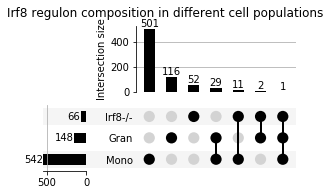

In [27]:
# Make upset plot out of the regulon composition of Irf8
reg_info_ls = [info_irf8, info_gran, info_mono]
discription_ls = ['Irf8-/-','Gran', 'Mono']

set_dict = get_sets(reg_info_ls, discription_ls, 'Irf8')
sets = from_contents(set_dict)
fig = plt.figure()
fig.suptitle('Irf8 regulon composition in different cell populations', fontsize=12)
plot(fig, subset_size='auto', intersection_plot_elements=3, totals_plot_elements=2,fig = fig, show_counts='%d', with_lines =True)
plt.savefig('Perturb_fig/irf8_upset_plot_Individual_types.pdf')

## Regulon activity vs gene expression

### Mean RAS over 50 replicates

In [49]:
for i in range(50):
    print(i, end = '...')
    if i == 0:
        temp = aucell(ex_matrix_irf8, regulons_wtKO)
    else:
        temp += aucell(ex_matrix_irf8, regulons_wtKO) #+ temp
mean_df_Irf8 = temp / 50

0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...

In [50]:
mean_df_Irf8.shape

(62, 157)

In [51]:
for i in range(50):
    print(i, end = '...')
    if i == 0:
        
        temp_norm = aucell(ex_matrix_normal, regulons_wtKO)
    else:
        temp_norm += aucell(ex_matrix_normal, regulons_wtKO) 
mean_df_normal = temp_norm / 50

0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...

In [53]:
mean_df_normal['type'] = 'wt'
mean_df_Irf8['type'] = 'Irf8--'


In [54]:
merge_mean = pd.concat([mean_df_normal, mean_df_Irf8], join='inner')

In [55]:
import random
random.seed(12)
np.random.seed(1)
adata_reg_mean = scanpy.AnnData(merge_mean.loc[:,~(merge_mean.columns == 'type')])
adata_reg_mean.obs = adata_ex.obs


... storing 'Genotype' as categorical
... storing 'cell-type' as categorical


saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/violinIrf8_RAS_mean_50_inference_on_all_cells.pdf


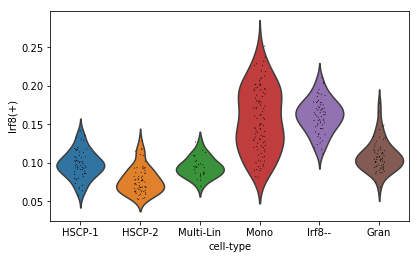

In [56]:
sc.pl.violin(adata_reg_mean, ['Irf8(+)'], groupby='cell-type', order = ['HSCP-1', 'HSCP-2', 'Multi-Lin', 'Mono', 'Irf8--', 'Gran'], save = 'Irf8_RAS_mean_50_inference_on_all_cells')

### Gene expression of Irf8

saving figure to file /gpfs/gss1/work/sduknn/Andreas/notebooks/MCA_TM/SCENIC/Perturb_fig/violin_Irf8_gene_expression.pdf


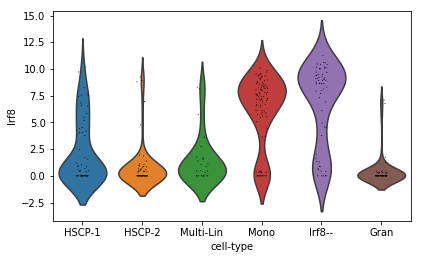

In [93]:
sc.pl.violin(adata_ex, ['Irf8'], groupby='cell-type', order = ['HSCP-1', 'HSCP-2', 'Multi-Lin', 'Mono', 'Irf8--', 'Gran'], save = '_Irf8_gene_expression')